In [ ]:
# Cell 1 - Tell python where to find the modules to import from

import sys
from pathlib import Path

#Path.cwd().parent depends on where you run this code from
#Path(__file__).resolve().parents[1] depends on where this file is located on disk
#
#project_root = .../1099-reconciliation-pipeline if notebook runs from the repo root or from notebooks/
cwd = Path.cwd()
project_root = cwd if (cwd / "src").exists() else cwd.parent # running from notebooks/  folder (cwd = current working directory) - .parent gets us to the folder above
sys.path.append(str(project_root)) #sys.path is a list of folders where python looks for modules
                                    # we add the project root to that list with .append

print("Project root: ", project_root)


Project root:  /Users/manuelreyes/Desktop/dev/1099_reconciliation_pipeline


'--------------------------------  Engine B: Load & Run Analysis  --------------------------------'

In [7]:
# Cell 2 — Imports, Load & Clean inputs (real paths)

from src import load_data
from src.clean_matrix import clean_matrix
from src.clean_relius_demo import clean_relius_demo
from src.age_taxcode_analysis import run_age_taxcode_analysis
from src.age_taxcode_visualization import (
    build_age_taxcode_metrics,
    plot_corrections_over_time,
    plot_mistake_breakdown,
)
from src.config import RAW_DATA_DIR, REPORTS_FIGURES_DIR

relius_demo_path = RAW_DATA_DIR / "real_demo_relius_2025.xlsx"
matrix_path = RAW_DATA_DIR / "real_all_matrix_2025.xlsx"

# Load and clean Matrix raw data
matrix_raw = load_data.load_matrix_excel(path=matrix_path, use_sample_if_none=False)
matrix_clean = clean_matrix(matrix_raw)

# Load and clean Relius demo raw data
relius_demo_raw = load_data.load_relius_demo_excel(path=relius_demo_path, use_sample_if_none=False)
relius_demo_clean = clean_relius_demo(relius_demo_raw)

# Run Engine B analysis
age_matches = run_age_taxcode_analysis(matrix_clean, relius_demo_clean)

print("Engine B rows:", age_matches.shape[0])
age_matches.head(5)


/var/folders/_5/q9dxw26d4rl_63x79z_n9kkm0000gn/T/ipykernel_14095/946216493.py:19: UserWarning: Matrix SSN normalization produced 11 invalid values.
  matrix_clean = clean_matrix(matrix_raw)
/Users/manuelreyes/Desktop/dev/1099_reconciliation_pipeline/src/normalizers.py:144: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.to_datetime(series, errors=errors, format=format, dayfirst=dayfirst).dt.date


Engine B rows: 6693


,plan_id,ssn,participant_name,state,gross_amt,fed_taxable_amt,txn_date,txn_method,tax_code_1,tax_code_2,...,attained_55_in_term_year,expected_tax_code_1,expected_tax_code_2,correction_reason,action,match_status,code_matches_expected,suggested_tax_code_1,suggested_tax_code_2,new_tax_code
0,IRA127PLAT,194362032,Sandra Marsh,PA,153.22,153.22,2025-11-04,ACH Distribution,7,<NA>,...,False,7,<NA>,age_59_5_or_over_normal_distribution,<NA>,perfect_match,True,7,<NA>,7
1,IRA127PLAT,209501562,Kathryn Clausen,PA,200.00,200.00,2025-11-04,ACH Distribution,7,<NA>,...,False,7,<NA>,age_59_5_or_over_normal_distribution,<NA>,perfect_match,True,7,<NA>,7
2,IRA127PLAT,194362032,Sandra Marsh,PA,153.22,153.22,2025-10-16,ACH Distribution,7,<NA>,...,False,7,<NA>,age_59_5_or_over_normal_distribution,<NA>,perfect_match,True,7,<NA>,7
3,IRA127PLAT,209501562,Kathryn Clausen,PA,200.00,200.00,2025-10-03,ACH Distribution,7,<NA>,...,False,7,<NA>,age_59_5_or_over_normal_distribution,<NA>,perfect_match,True,7,<NA>,7
4,IRA127PLAT,194362032,Sandra Marsh,PA,153.22,153.22,2025-09-03,ACH Distribution,7,<NA>,...,False,7,<NA>,age_59_5_or_over_normal_distribution,<NA>,perfect_match,True,7,<NA>,7


'--------------------------------  Metrics & Plots  --------------------------------'

In [3]:
# Cell 3 — Build monthly correction metrics

metrics_df = build_age_taxcode_metrics(age_matches)
metrics_df.head(10)


,txn_month,total_txns,correction_count,correction_rate
0,2025-06-01,1054,73,0.069260
1,2025-07-01,1096,54,0.049270
2,2025-08-01,1112,52,0.046763
3,2025-09-01,1209,40,0.033085
4,2025-10-01,1172,40,0.034130
5,2025-11-01,1050,31,0.029524


Saved: /Users/manuelreyes/Desktop/dev/1099_reconciliation_pipeline/reports/figures/engine_b_correction_rate_by_month.png


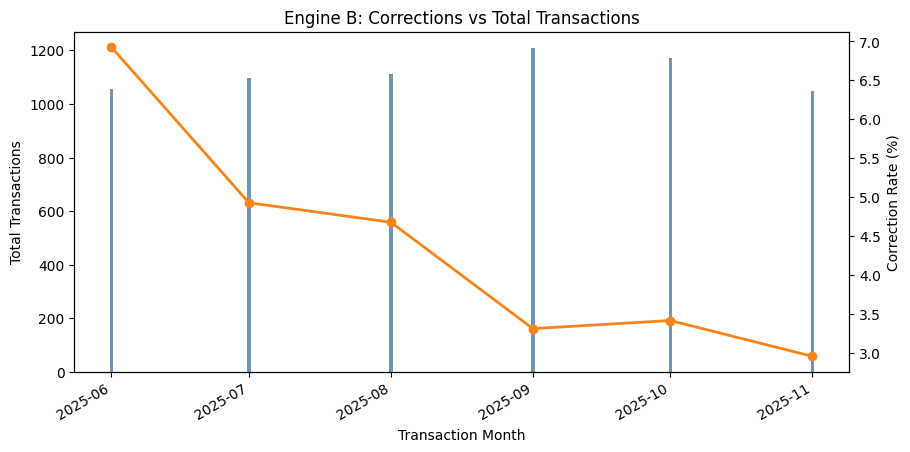

In [4]:
# Cell 4 — Plot corrections over time and save

fig1, _ = plot_corrections_over_time(metrics_df)
output_path = REPORTS_FIGURES_DIR / "engine_b_correction_rate_by_month.png"
fig1.savefig(output_path, dpi=150, bbox_inches="tight")
print("Saved:", output_path)


Saved: /Users/manuelreyes/Desktop/dev/1099_reconciliation_pipeline/reports/figures/engine_b_mistake_breakdown.png


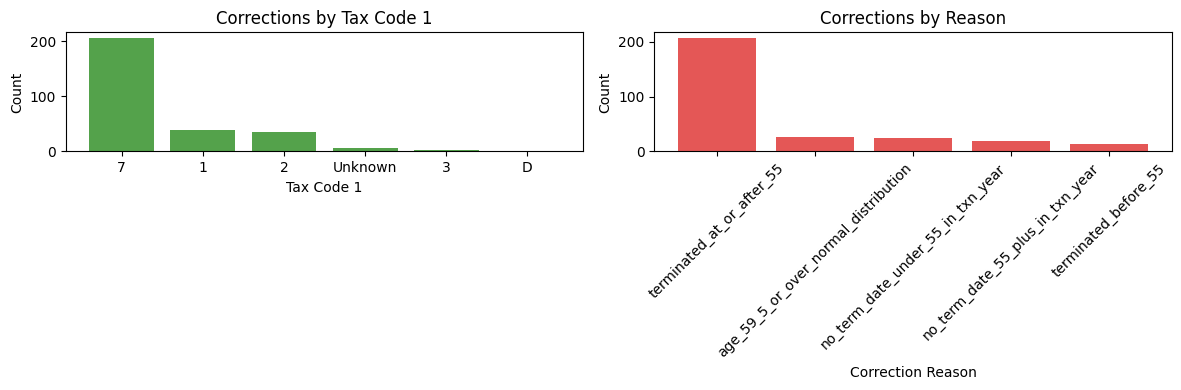

In [5]:
# Cell 5 — Plot mistake breakdown and save

fig2, _ = plot_mistake_breakdown(age_matches)
output_path = REPORTS_FIGURES_DIR / "engine_b_mistake_breakdown.png"
fig2.savefig(output_path, dpi=150, bbox_inches="tight")
print("Saved:", output_path)
